# Linear Regression Project-1

### Importing Libraries

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read CSV file

In [165]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


### Scatter graph of data and setting labels 

Text(0, 0.5, 'Height')

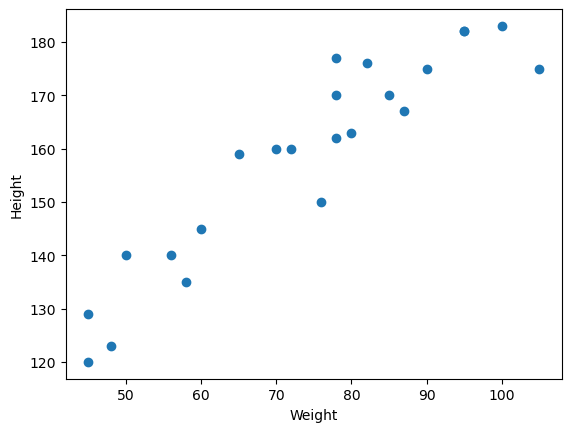

In [166]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

### Choosing Independent and Dependent feature

In [167]:
x=df[['Weight']] #independent feature
y=df['Height'] #dependent feature

### Split data into train and test segments

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [170]:
X_test.shape

(5, 1)

In [171]:
X_train.shape

(18, 1)

In [172]:
x.shape

(23, 1)

### Standardized the data

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler=StandardScaler()

In [175]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

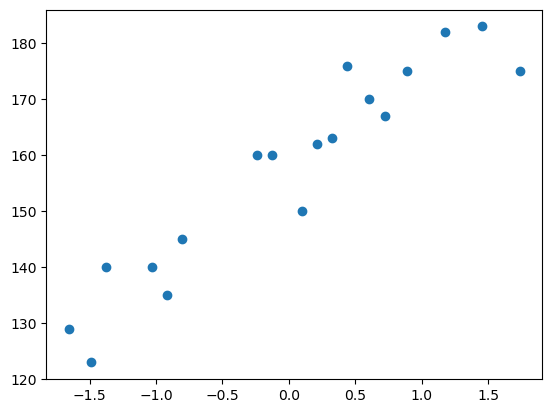

In [176]:
plt.scatter(X_train,Y_train)

### Apply Linear Regression and train model to get best-fit line

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
regressor=LinearRegression()

In [179]:
regressor.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [180]:
print("The slope or cofficient of weight is ",regressor.coef_)

The slope or cofficient of weight is  [17.03440872]


In [181]:
print("Intercept",regressor.intercept_)

Intercept 157.5


The best-fit line for this data


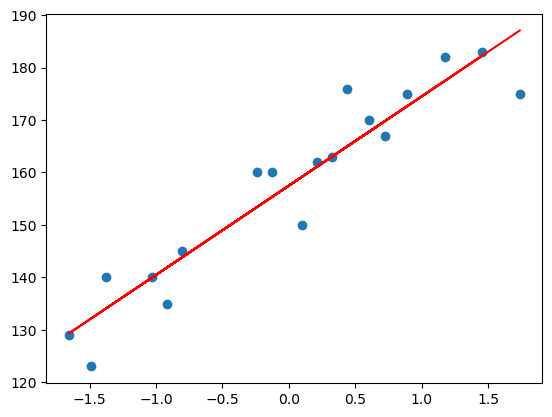

In [194]:
print("The best-fit line for this data")
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### Prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. Y_predict_train =157.5 + 17.03(X_train)
          
### Prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. Y_predict_test =157.5 + 17.03(X_test)

In [183]:
Y_predict_test=regressor.predict(X_test)

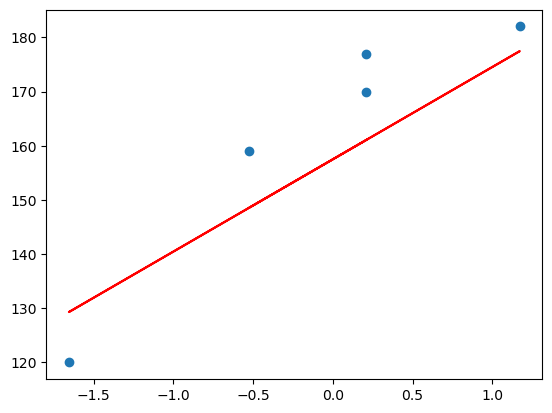

In [184]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance Metrics

### MSE,MAE,RMSE
### R square and adjusted R square

In [185]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [186]:
mse=mean_squared_error(Y_test,Y_predict_test)
mae=mean_absolute_error(Y_test,Y_predict_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [187]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_predict_test)

In [188]:
score

0.776986986042344

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [189]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231252

#### The linear regression model shows a strong relationship between weight and height. The R² value of 0.77 indicates that approximately 77% of the variation in height is explained by weight, while the adjusted R² of 0.70 confirms the reliability of the model.

## Prediction for new data point 

In [190]:
scaled_weight=scaler.transform([[85]])
scaled_weight

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.60618436]])

In [191]:
scaled_weight[0]

array([0.60618436])

In [192]:
regressor.predict([scaled_weight[0]])

array([167.82599217])

In [193]:
print("The prediciton of height for weight 85 kg is: ",regressor.predict([scaled_weight[0]]))

The prediciton of height for weight 85 kg is:  [167.82599217]
